In [1]:
pip install cython

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/philferriere/cocoapi.git to c:\users\snchowdh\appdata\local\temp\pip-req-build-f_uikopm
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/philferriere/cocoapi.git 'C:\Users\snchowdh\AppData\Local\Temp\pip-req-build-f_uikopm'


In [3]:
cd C:/Users/snchowdh/Documents/Tensorflow/models/research/

C:\Users\snchowdh\Documents\Tensorflow\models\research


In [5]:
pip install --use-feature=2020-resolver .

Processing c:\users\snchowdh\documents\tensorflow\models\research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1679648 sha256=729f9852262dd7e2229a024db83839e5b79808288ae1244a9ccf3a8ce5d054ed
  Stored in directory: C:\Users\snchowdh\AppData\Local\Temp\pip-ephem-wheel-cache-is6x746q\wheels\f2\c2\e4\fec63a0baf7e7ea7ee318a74332ebb9f311ed56f46f0099a50
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [6]:
pip install . --use-feature=in-tree-build

Processing c:\users\snchowdh\documents\tensorflow\models\research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1679648 sha256=1f7e4fd5230a6192d3d30ec5beb93f90b4d4af8b7530bcf54a020afc5dfdcf48
  Stored in directory: C:\Users\snchowdh\AppData\Local\Temp\pip-ephem-wheel-cache-ems98kxg\wheels\f2\c2\e4\fec63a0baf7e7ea7ee318a74332ebb9f311ed56f46f0099a50
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

In [9]:
# Download and extract model
def download_model(model_name, model_date):
    base_url = 'http://download.tensorflow.org/models/object_detection/tf2/'
    model_file = model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(fname=model_name,
                                        origin=base_url + model_date + '/' + model_file,
                                        untar=True)
    return str(model_dir)

MODEL_DATE = '20200711'
MODEL_NAME = 'ssd_mobilenet_v2_320x320_coco17_tpu-8'
PATH_TO_MODEL_DIR = download_model(MODEL_NAME, MODEL_DATE)

46047232/46042990 [==============================] - 0s 0us/step


In [10]:
# Download labels file
def download_labels(filename):
    base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/'
    label_dir = tf.keras.utils.get_file(fname=filename,
                                        origin=base_url + filename,
                                        untar=False)
    label_dir = pathlib.Path(label_dir)
    return str(label_dir)

LABEL_FILENAME = 'mscoco_label_map.pbtxt'
PATH_TO_LABELS = download_labels(LABEL_FILENAME)

In [11]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 7.592650651931763 seconds


In [12]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [15]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


In [16]:
import io
import os
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

Elapsed time: 0.629288117090861 second per image


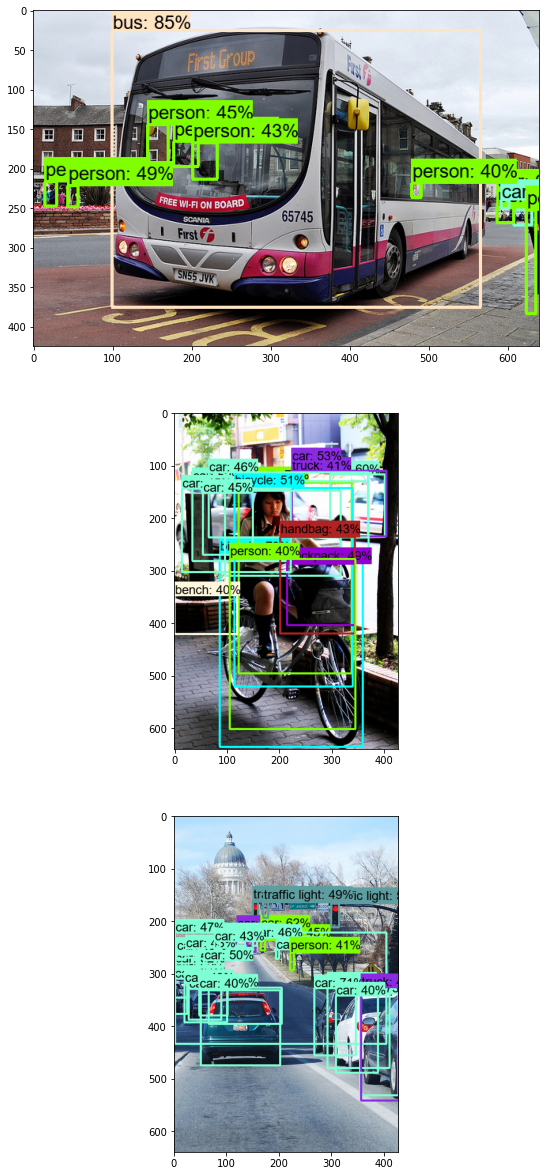

In [17]:
import time

image_dir = 'C:/Users/snchowdh/fiftyone/coco-2017/validation/data'
n=3
elapsed = []
for i in range(n):
  image_path = os.path.join(image_dir, 'image' + str(i + 1) + '.jpg')
  image_np = load_image_into_numpy_array(image_path)
  input_tensor = np.expand_dims(image_np, 0)
  start_time = time.time()
  detections = detect_fn(input_tensor)
  end_time = time.time()
  elapsed.append(end_time - start_time)

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)
  plt.subplot(n, 1, i+1)
  plt.imshow(image_np_with_detections)

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')

In [18]:
print(input_tensor.shape)

(1, 640, 428, 3)
